In [5]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData

# Lectura de datos

In [6]:
air_passengers_df = pd.read_csv("../kats/data/air_passengers.csv")
air_passengers_df.columns = ["time", "value"]
air_passengers_df.head()


,time,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
## https://www.kaggle.com/datasets/bobnau/daily-website-visitors/code
daily_website_df = pd.read_csv("../kats/data/daily-website-visitors.csv")
daily_website_df.head()
# Function to remove commas
def remove_commas(x):
    return float(x.replace(',', ''))
# Apply the preprocessing functions

daily_website_df['Date'] = pd.to_datetime(daily_website_df['Date'])
daily_website_df['Page.Loads'] = daily_website_df['Page.Loads'].apply(lambda x : remove_commas(x))
daily_website_df['Unique.Visits'] = daily_website_df['Unique.Visits'].apply(lambda x : remove_commas(x))
daily_website_df['First.Time.Visits'] = daily_website_df['First.Time.Visits'].apply(lambda x : remove_commas(x))
daily_website_df['Returning.Visits'] = daily_website_df['Returning.Visits'].apply(lambda x : remove_commas(x))
daily_website_df['Day.Of.Week']
df_mask=daily_website_df['Day.Of.Week']==2
daily_website_df_monday = daily_website_df[df_mask]


daily_website_df.drop(['Row','Day','Day.Of.Week','Returning.Visits'],inplace=True,axis=1)
daily_website_df.columns = ["time", "PageLoads","UniqueVisits", "FirstTimeVisits" ]

daily_website_df_monday.drop(['Row','Day','Day.Of.Week','Returning.Visits'],inplace=True,axis=1)
daily_website_df_monday.columns = ["time", "PageLoads","UniqueVisits", "FirstTimeVisits" ]



## First study

In [8]:
# air_passengers_df.shape
air_passengers_df.describe()
air_passengers_df.dtypes

time     object
value     int64
dtype: object

In [9]:

daily_website_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PageLoads,2167.0,4116.989386,1350.977843,1002.0,3114.5,4106.0,5020.5,7984.0
UniqueVisits,2167.0,2943.646516,977.886472,667.0,2226.0,2914.0,3667.5,5541.0
FirstTimeVisits,2167.0,2431.824181,828.704688,522.0,1830.0,2400.0,3038.0,4616.0


## First visualitation

In [10]:
air_passengers_ts = TimeSeriesData(air_passengers_df)
daily_website_ts = TimeSeriesData(daily_website_df)

daily_website_ts_monday = TimeSeriesData(daily_website_df_monday)

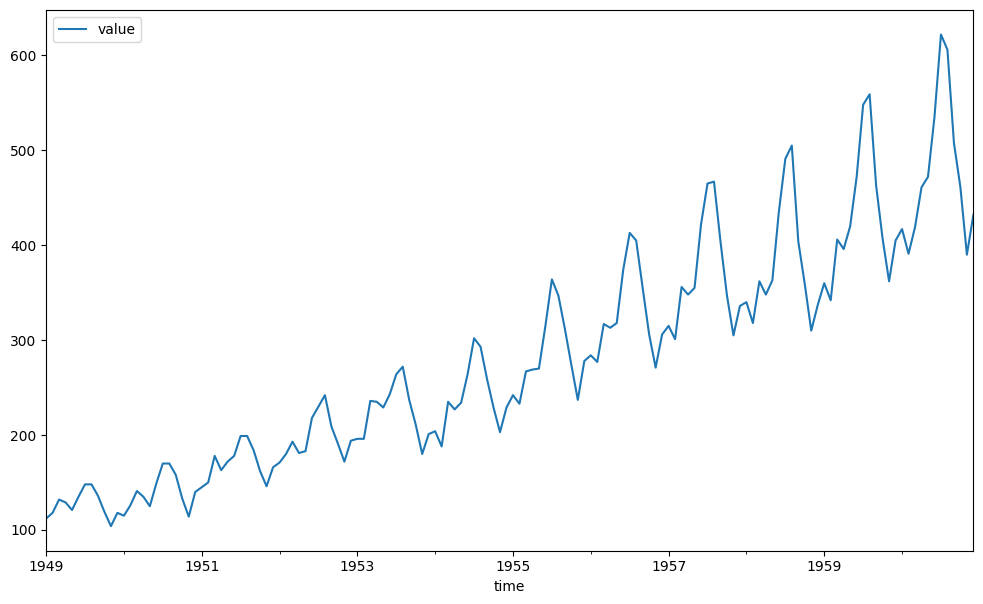

In [11]:
%matplotlib inline

# Must pass the name of the value columns to plot
air_passengers_ts.plot(cols=['value'])
plt.show()

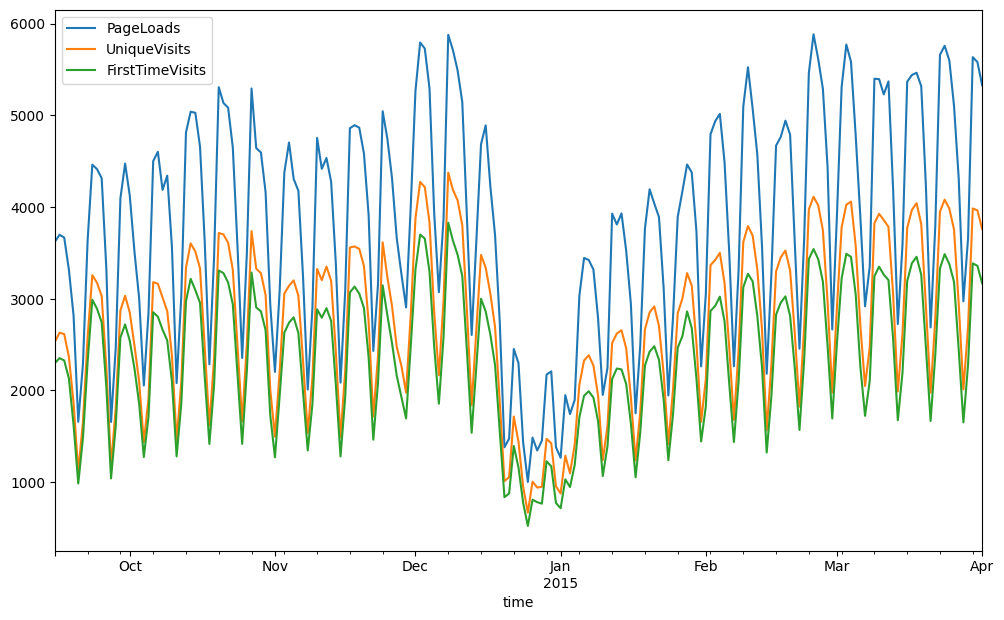

In [20]:
# We can plot multiple time series from multi_ts by passing in the name of each value column we want to plot
daily_website_ts[1:200].plot(cols=["PageLoads","UniqueVisits", "FirstTimeVisits"])
plt.show()

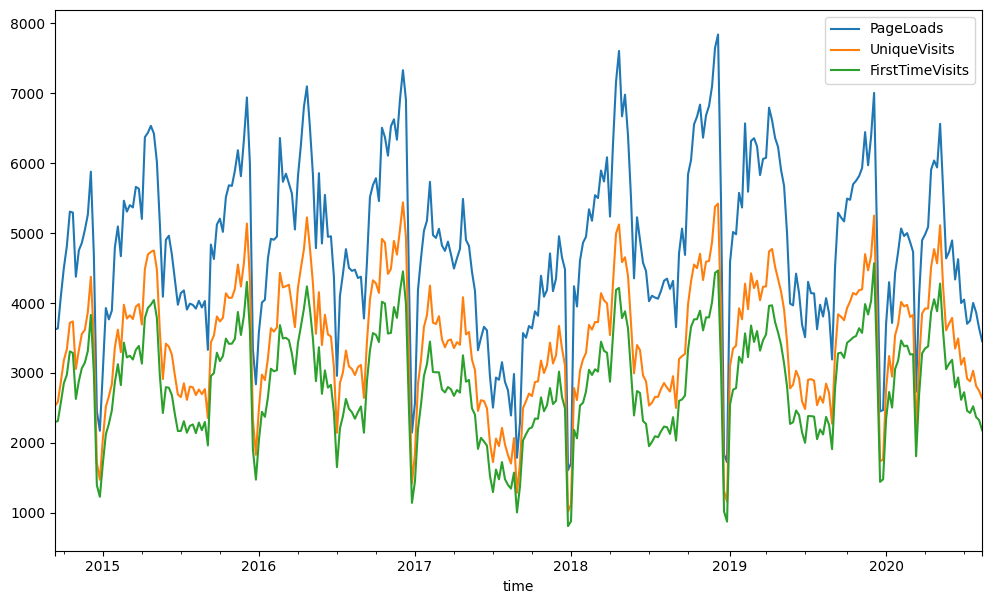

In [15]:
# We can plot multiple time series from multi_ts by passing in the name of each value column we want to plot
daily_website_ts_monday.plot(cols=["PageLoads","UniqueVisits", "FirstTimeVisits"])
plt.show()